# HR Case Study

### Internshala data

Matching Employees with  right interns

## Understanding Problem Statement

## Problem Statement

* In this problem, we have been provided with information about various **internships posted** on Internshala. (This includes various attributes about the internships like location, duration, start_date of internship etc.)

* We have also been provided information about the **students who have applied** for the internship. (These include type_of_institute, current_year, academic performance of the student etc.)

* Any student is free to apply for any internship on the portal.


*While employers get high response to their posting, it is difficult to go through a high number of applications for the employers. They might need to go through high number of applications to shortlist the most relevant candidates. Hence an intelligent matching algorithm can help our users get better experience and enhance chances of meaningful profile matches.*



## Description of the files

* **Internship.csv** - includes the details of all the internships posted on Internshala. These details are filled by the company floating the Internship. Each row represents one internship.

* **Student.csv** - includes details of the students applying for the internship. These details have been filled by the student. Each row represents an experience of the student. In case the student has not filled any experience, there would be only one row containing details of student.

* **test.csv & train.csv** - include the application details (as applied by student) and the shortlist outcome



# Exploratory Questions to be answered

* What are the skills that an HR looks for in a candidate for shortlisting him/her for an internship

* The trend of Internshipp Opportunities and their availability comparision with students avalability

* Most and least popular intership that students apply for and the category of most offered internships

* Locations students can apply at and which location is intaking most inters

* Internship offered based on Internship type (regular, virtual, part-time)

## Data Understanding

In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# read train files in trainfiles,i.e., internships, students, shortlisted
df_internship = pd.read_csv("trainfiles/Internship/Internship.csv")
df_student = pd.read_csv("trainfiles/Student/Student.csv")
df_train = pd.read_csv("trainfiles/traincsv/train.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3044: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# INTERNSHIPS LISTED
df_internship.shape

(6899, 286)

In [4]:
# STUDENT APPLICATIONS RECEIVED
df_student.shape

(151191, 19)

In [5]:
# SHORTLISTED STUDENTS DATA for Training ML model
df_train.shape

(192582, 8)

In [6]:
df_internship.iloc[:,:13].describe()

,Internship_ID,No_of_openings,Stipend1,Stipend2,Internship_Duration(Months)
count,6899.000000,6899.000000,6771.000000,3151.000000,6.899000e+03
mean,8016.000000,4.447601,5673.532270,10518.329102,5.849465e+03
std,1991.714086,6.395352,4318.323717,7407.088517,3.432311e+05
min,4567.000000,1.000000,1.000000,100.000000,0.000000e+00
25%,6291.500000,2.000000,3000.000000,5000.000000,2.000000e+00
50%,8016.000000,2.000000,5000.000000,10000.000000,3.000000e+00
75%,9740.500000,5.000000,8000.000000,15000.000000,4.000000e+00
max,11465.000000,100.000000,50000.000000,150000.000000,2.016033e+07


In [7]:
df_student.describe()

,Student_ID,Year_of_graduation,Performance_PG,PG_scale,Performance_UG,UG_Scale,Performance_12th,Performance_10th
count,1.511910e+05,151191.000000,151191.000000,151191.000000,151191.000000,151191.000000,151191.000000,151191.000000
mean,2.173736e+07,2015.225152,4.560760,25.360002,32.506286,47.842054,77.652632,78.335971
std,2.828474e+07,1.434272,16.150917,34.032013,30.976177,44.642229,14.597772,19.731535
min,7.654321e+06,2001.000000,0.000000,4.000000,0.000000,4.000000,0.000000,0.000000
25%,7.671942e+06,2015.000000,0.000000,10.000000,7.200000,10.000000,69.000000,74.000000
50%,7.690571e+06,2015.000000,0.000000,10.000000,8.660000,10.000000,80.000000,84.000000
75%,7.708364e+06,2016.000000,0.000000,10.000000,66.000000,100.000000,89.000000,90.800000
max,7.866876e+07,2020.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [8]:
df_train.describe()

,Internship_ID,Student_ID,Minimum_Duration,Is_Part_Time,Is_Shortlisted
count,192582.000000,1.925820e+05,192582.000000,192582.000000,192582.000000
mean,7910.562919,2.161640e+07,3.790043,0.343012,0.127629
std,2006.863160,2.819268e+07,2.702877,0.474717,0.333677
min,4568.000000,7.654321e+06,1.000000,0.000000,0.000000
25%,6111.000000,7.672068e+06,2.000000,0.000000,0.000000
50%,8072.000000,7.690870e+06,3.000000,0.000000,0.000000
75%,9649.000000,7.708160e+06,6.000000,1.000000,0.000000
max,11334.000000,7.866825e+07,12.000000,1.000000,1.000000


In [9]:
# View Internships
df_internship.head(2)

,Internship_ID,Internship_Profile,Skills_required,Internship_Type,Internship_Location,Internship_category,No_of_openings,Stipend_Type,Stipend1,Stipend2,...,PhoneGap,Storytelling,MySQL.,Ionic,Design Skills,Corporate Sales,Entrepreneurship,Films,Foundation,Payment Gateway
0,6653,Creative Content Writing,NaN,virtual,IIGB,Part time,5,variable,1500.0,2000.0,...,0,0,0,0,0,0,0,0,0,0
1,9351,Strategic Philanthropy,NaN,regular,JABD,Part time,5,unpaid,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# VIew Students Applicants
df_student.head(2)

,Student_ID,Institute_Category,Institute_location,hometown,Degree,Stream,Current_year,Year_of_graduation,Performance_PG,PG_scale,Performance_UG,UG_Scale,Performance_12th,Performance_10th,Experience_Type,Profile,Location,Start Date,End Date
0,7654321,Y,JADH,IIDB,B.Tech and M.Tech (Dual Degree),Mathematics & Computing,already a graduate,2012,8.5,10,8.6,10,86.2,91.6,job,Software Engineering,IJCE,18-06-2013,21-06-2014
1,7654321,Y,JADH,IIDB,B.Tech and M.Tech (Dual Degree),Mathematics & Computing,already a graduate,2012,8.5,10,8.6,10,86.2,91.6,job,Software Development,IIDB,01-07-2013,NaN


In [11]:
# View Training Data
df_train.head(2)

,Internship_ID,Student_ID,Earliest_Start_Date,Expected_Stipend,Minimum_Duration,Preferred_location,Is_Part_Time,Is_Shortlisted
0,8161,78663553,03-01-2015,2-5K,3,NaN,0,0
1,4977,7695797,19-12-2014,5-10K,2,IHFG,1,0


# Modeling

### The csv file saved in R environment is imported in python environment for further processing


In [1]:
# Load the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [2]:
train = pd.read_csv('../input/TrainD.csv')
test = pd.read_csv('../input/TestD.csv')

In [3]:
train.shape,test.shape

((192582, 118), (107428, 117))

In [4]:
train.dtypes

Internship_ID                           int64
Student_ID                              int64
Expected_Stipend                        int64
Minimum_Duration                        int64
Is_Part_Time                            int64
Institute_Category                      int64
Performance_PG                        float64
Performance_UG                        float64
Performance_12th                      float64
Performance_10th                      float64
Num_Exp_Row                             int64
No_of_openings                          int64
Internship_Duration.Months.             int64
Exp_tenure                              int64
Is_PlNo_Pref                            int64
Is_PlIHFG                               int64
Is_PlIHJB                               int64
Is_PlIIBD                               int64
Is_PlIIDB                               int64
Is_PlIJBG                               int64
Is_PlIJCE                               int64
Is_PlIJJI                         

In [5]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn import metrics 

In [6]:
target='Is_Shortlisted'
Internship_ID = 'Internship_ID'
Student_ID = 'Student_ID'

In [7]:
train['Is_Shortlisted'].value_counts()

0    168003
1     24579
Name: Is_Shortlisted, dtype: int64

In [8]:
def modelfit(alg, dtrain, dtest, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Is_Shortlisted'])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, dtrain[predictors], dtrain['Is_Shortlisted'], cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain['Is_Shortlisted'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Is_Shortlisted'], dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
                
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

### Baseline Model
* Since here the criteria is AUC, simply predicting the most prominent class would give an AUC of 0.5 always. 
* Another way of getting a baseline model is to use the algorithm without tuning, i.e. with default parameters.


In [9]:
#Choose all predictors except target & IDcols
predictors = [x for x in train.columns if x not in [target, Internship_ID,Student_ID]]
gbm0 = GradientBoostingClassifier(random_state=10)


In [10]:
# to check if there is any NaN
np.any(np.isnan(train)), np.all(np.isfinite(train))

(True, False)

In [11]:
train.fillna(0,inplace=True) # fill 0 inpalce of NaN
# to check after filling NaN
np.any(np.isnan(train)), np.all(np.isfinite(train))

(False, True)


Model Report
Accuracy : 0.8758
AUC Score (Train): 0.750221
CV Score : Mean - 0.6623082 | Std - 0.01868213 | Min - 0.6375912 | Max - 0.6816427


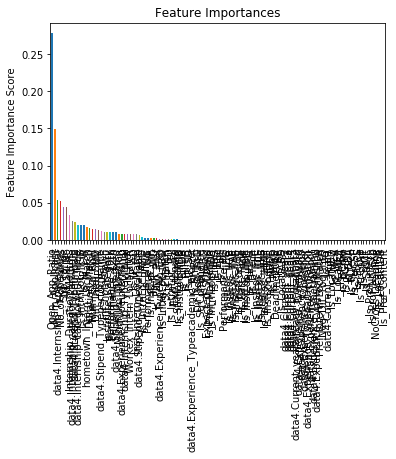

In [12]:
modelfit(gbm0, train, test, predictors)

In [13]:
pd.Series(gbm0.feature_importances_, predictors).sort_values(ascending=False)[1:30]

Num_Applicant                         0.148870
data4.Internship_Typeregular          0.053917
No_of_openings                        0.052579
Stip_range                            0.044923
Is_SR_No                              0.044619
Internship_Duration.Months.           0.034010
data4.Internship_categoryPart.time    0.026140
data4.Stipend_Typeunpaid              0.023760
data4.Internship_categoryFull.Time    0.020248
Is_IntrnLoc_IIGB                      0.020024
Is_IP_CW                              0.019891
hometown_Intern_LocMatch              0.016766
Duration_Match                        0.016419
Num_Exp_Row                           0.015190
Diff_Intdl_StrD                       0.014788
Is_IP_MK                              0.012739
data4.Stipend_Typeperformance         0.012451
Inf_hometown                          0.011311
Institute_Category                    0.010755
Performance_10th                      0.010601
Performance_12th                      0.010076
data4.Stipend

In [14]:
#Taking important features as predictors
predictors1= ['Stip_range','Num_Applicant','No_of_openings','Internship_Duration.Months.','Is_SR_No','Diff_Intdl_StrD', 'Minimum_Duration','Performance_10th','data4.Internship_categoryPart.time','Num_Exp_Row','Duration_Match', 'hometown_Intern_LocMatch','data4.Internship_Typeregular','data4.Stipend_Typeunpaid','Is_IP_MK','Inf_hometown', 'Is_IP_CW','Institute_Category','data4.Stipend_Typeperformance','data4.Internship_Typevirtual','data4.Experience_Typeinternship','Inst_Intern_LocMatch','Is_Prof','Performance_12th','Is_IntrnLoc_JABD','data4.Stipend_Typefixed','Workex_Intern_LocMatch','Is_IP_AD','Performance_UG','Is_PlIJCE', 'data4.Internship_categoryFull.Time','data4.Stipend_Typevariable','Is_IntrnLoc_IIGB','Is_InstLoc_IIIF','Is_IP_BD','NoCross_Deadline','Is_PlNo_Pref','Is_PlIHJB','Is_StrMarketing','Is_IntrnLoc_IIDB','Is_IP_WD','Is_IntrnLoc_IIBD','Is_IntrnLoc_JEJJ','Is_IP_SD','Is_InstLoc_IIDB','Is_StrCommerce','Exp_tenure','Is_Part_Time','St_EMatch','Dif_Yog_IntD','data4.Experience_Typeacademic_project','data4.Current_year2','data4.Experience_TypeNo_Exp','Expected_Stipend','Is_Prof_Marketing','Is_MTech','Is_PlIIDB']

In [15]:
#Choose important predictors and excepting target & IDcols
predictors = predictors1
param_test1 = {'n_estimators':range(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500, min_samples_leaf=50,max_depth=8,max_features='sqrt', subsample=0.8,random_state=10), param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train[predictors],train[target])

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=50, min_sa...      subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'n_estimators': range(20, 81, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [20]:
#gsearch1.grid_scores_
gsearch1.cv_results_
gsearch1.best_params_
gsearch1.best_score_

0.6750645216043039

In [21]:
#Grid seach on subsample and max_features
predictors = predictors1
param_test2 = {'max_depth':range(2,7,2), 'min_samples_split':range(100,400,100)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=70, max_features='sqrt', subsample=0.8, random_state=10), param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(train[predictors],train[target])

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sam...      subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'max_depth': range(2, 7, 2), 'min_samples_split': range(100, 400, 100)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [22]:
#gsearch2.grid_scores_
gsearch2.cv_results_
gsearch2.best_params_
gsearch2.best_score_

0.6743607942043763

In [23]:
#Grid seach on subsample and max_features
predictors = predictors1
param_test3 = {'min_samples_split':range(50,200,50), 'min_samples_leaf':range(30,71,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=70,max_depth=4, max_features='sqrt', subsample=0.8, random_state=10), param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(train[predictors],train[target])

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sam...      subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'min_samples_split': range(50, 200, 50), 'min_samples_leaf': range(30, 71, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [24]:
#gsearch3.grid_scores_
gsearch3.cv_results_
gsearch3.best_estimator_
gsearch3.best_score_

0.6830675608165294


Model Report
Accuracy : 0.8738
AUC Score (Train): 0.746312
CV Score : Mean - 0.6830676 | Std - 0.02256617 | Min - 0.6611235 | Max - 0.7245521


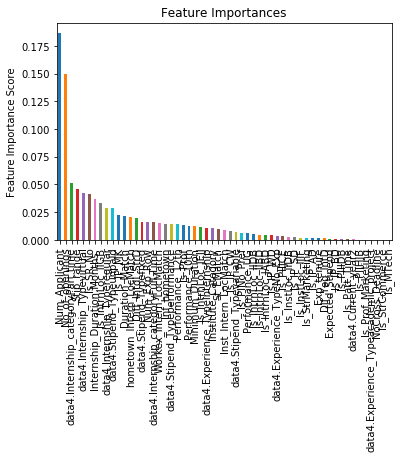

In [25]:
modelfit(gsearch3.best_estimator_, train, test, predictors)

In [26]:
#Tune max_features:
#Grid seach on subsample and max_features
param_test4 = {'max_features':range(5,20,2)}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=70,max_depth=4, min_samples_split=150, min_samples_leaf=70, subsample=0.8, random_state=10), param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(train[predictors],train[target])

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=70, min_samp...      subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'max_features': range(5, 20, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [27]:
#gsearch4.grid_scores_
gsearch4.cv_results_
gsearch4.best_params_
gsearch4.best_score_

0.6812990312698559

In [28]:
### Step3- Tune Subsample and Lower Learning Rate
#Grid seach on subsample and max_features
param_test5 = {'subsample':[0.7,0.75,0.8,0.85,0.9]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=70,max_depth=4, min_samples_split=150, min_samples_leaf=70, random_state=10, max_features=7), param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(train[predictors],train[target])

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features=7, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=70, min_samples...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'subsample': [0.7, 0.75, 0.8, 0.85, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [29]:
#gsearch5.grid_scores_
gsearch5.cv_results_
gsearch5.best_params_
gsearch5.best_score_

0.6823435687556584


Model Report
Accuracy : 0.8734
AUC Score (Train): 0.739402
CV Score : Mean - 0.6790757 | Std - 0.01970682 | Min - 0.6599959 | Max - 0.7168823


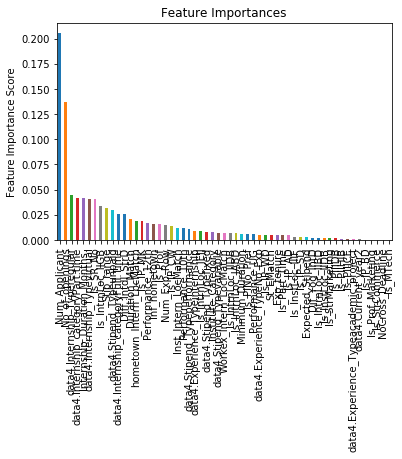

In [30]:
#  With all tuned lets try reducing the learning rate and proportionally increasing the number of estimators to get
#  more robust results:

predictors = predictors1
gbm_tuned_1 = GradientBoostingClassifier(learning_rate=0.05, n_estimators=120,max_depth=4, min_samples_split=150,min_samples_leaf=70, subsample=0.7, random_state=10, max_features=5)
modelfit(gbm_tuned_1, train, test, predictors)

In [31]:
est = GradientBoostingClassifier(learning_rate=0.05, n_estimators=120,max_depth=4, min_samples_split=150, min_samples_leaf=70, subsample=0.7, random_state=10, max_features=5)

In [32]:

est.fit(train[predictors],train[target])


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=4,
              max_features=5, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=70, min_samples_split=150,
              min_weight_fraction_leaf=0.0, n_estimators=120,
              n_iter_no_change=None, presort='auto', random_state=10,
              subsample=0.7, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [33]:

test.fillna(0,inplace=True)

# predict probabilities
prob = est.predict_proba(test[predictors])[:,1]


In [34]:

test1=test
test1['Is_Shortlisted']=prob[:]
test1.to_csv('DYD_SEC1.csv', columns=['Internship_ID','Student_ID','Is_Shortlisted'],index=False)
